Domain adaptation is a type of transfer learning where a model trained on one dataset (source domain) is adjusted to perform well on a different but related dataset (target domain).

In traditional machine learning, models perform well on data that closely resembles their training set. However, in real-world scenarios:

Data from different sources often have varying distributions (e.g., differences in sensors, regions, or experimental conditions).
Collecting and labeling new data for every scenario is expensive and time-consuming.
Domain adaptation allows us to reuse knowledge from an existing dataset (source) to improve predictions on a new dataset (target) without training from scratch.

Our approach trains the model to remain reliable and adaptable, even when working with slightly different data from the same domain. We achieve this using two key techniques: TrAdaBoostR2 and Balanced Weighting (BW).

bandgap_features.csv - contains the complete data.
Sparse X cluster - has the

In [5]:
!pip install adapt
!pip install matminer
!pip install numpy==1.23

  Using cached numpy-1.23.0.tar.gz (10.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 112, in get_requires_for_build_wheel
          backend = _build_backend()
                    ^^^^^^^^^^^^^^^^
        File "/opt/anaconda3

In [7]:
import numpy as np
import pandas as pd
df = pd.read_csv('/Applications/sab_kuch/aims_project/bandgap_features.csv')

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from matminer.featurizers.conversions import StrToComposition
import os
from matminer.featurizers.composition import ElementProperty
from adapt.instance_based import TrAdaBoostR2

In [11]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,formula,gap expt,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData range AtomicWeight,MagpieData mean AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mode AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData mode Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData range Row,MagpieData mean Row,MagpieData avg_dev Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData avg_dev CovalentRadius,MagpieData mode CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData range NsValence,MagpieData mean NsValence,MagpieData avg_dev NsValence,MagpieData mode NsValence,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData range NpValence,MagpieData mean NpValence,MagpieData avg_dev NpValence,MagpieData mode NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData mode NdValence,MagpieData minimum NfValence,MagpieData maximum NfValence,MagpieData range NfValence,MagpieData mean NfValence,MagpieData avg_dev NfValence,MagpieData mode NfValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData range NValence,MagpieData mean NValence,MagpieData avg_dev NValence,MagpieData mode NValence,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData range NsUnfilled,MagpieData mean NsUnfilled,MagpieData avg_dev NsUnfilled,MagpieData mode NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData mean NpUnfilled,MagpieData avg_dev NpUnfilled,MagpieData mode NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData range NdUnfilled,MagpieData mean NdUnfilled,MagpieData avg_dev NdUnfilled,MagpieData mode NdUnfilled,MagpieData minimum NfUnfilled,MagpieData maximum NfUnfilled,MagpieData range NfUnfilled,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData mode NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mode GSbandgap,MagpieData minimum GSmagmom,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,0,Ag(AuS)2,0.00,Ag1 Au2 S2,16.0,79.0,63.0,47.400000,25.280000,16.0,65.0,88.0,23.0,74.600000,10.720000,66.0,32.065,196.966569,164.901569,113.186268,67.024241,32.0650,388.36,1337.33,948.9

In [13]:
df.shape

(4604, 136)

In [15]:
print(df.columns.to_list())  # Shows all column names as a full list


['Unnamed: 0', 'formula', 'gap expt', 'composition', 'MagpieData minimum Number', 'MagpieData maximum Number', 'MagpieData range Number', 'MagpieData mean Number', 'MagpieData avg_dev Number', 'MagpieData mode Number', 'MagpieData minimum MendeleevNumber', 'MagpieData maximum MendeleevNumber', 'MagpieData range MendeleevNumber', 'MagpieData mean MendeleevNumber', 'MagpieData avg_dev MendeleevNumber', 'MagpieData mode MendeleevNumber', 'MagpieData minimum AtomicWeight', 'MagpieData maximum AtomicWeight', 'MagpieData range AtomicWeight', 'MagpieData mean AtomicWeight', 'MagpieData avg_dev AtomicWeight', 'MagpieData mode AtomicWeight', 'MagpieData minimum MeltingT', 'MagpieData maximum MeltingT', 'MagpieData range MeltingT', 'MagpieData mean MeltingT', 'MagpieData avg_dev MeltingT', 'MagpieData mode MeltingT', 'MagpieData minimum Column', 'MagpieData maximum Column', 'MagpieData range Column', 'MagpieData mean Column', 'MagpieData avg_dev Column', 'MagpieData mode Column', 'MagpieData min

In [17]:
y = df['gap expt'].values

In [19]:
y

array([0.  , 0.  , 1.83, ..., 0.  , 0.  , 0.  ])

In [42]:
excluded = ["formula", "composition", "gap expt"]
X = df.drop(excluded, axis=1)
X2 = X.copy

In [23]:
X.head()

,Unnamed: 0,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData range AtomicWeight,MagpieData mean AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mode AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData mode Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData range Row,MagpieData mean Row,MagpieData avg_dev Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData avg_dev CovalentRadius,MagpieData mode CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData range NsValence,MagpieData mean NsValence,MagpieData avg_dev NsValence,MagpieData mode NsValence,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData range NpValence,MagpieData mean NpValence,MagpieData avg_dev NpValence,MagpieData mode NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData mode NdValence,MagpieData minimum NfValence,MagpieData maximum NfValence,MagpieData range NfValence,MagpieData mean NfValence,MagpieData avg_dev NfValence,MagpieData mode NfValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData range NValence,MagpieData mean NValence,MagpieData avg_dev NValence,MagpieData mode NValence,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData range NsUnfilled,MagpieData mean NsUnfilled,MagpieData avg_dev NsUnfilled,MagpieData mode NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData mean NpUnfilled,MagpieData avg_dev NpUnfilled,MagpieData mode NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData range NdUnfilled,MagpieData mean NdUnfilled,MagpieData avg_dev NdUnfilled,MagpieData mode NdUnfilled,MagpieData minimum NfUnfilled,MagpieData maximum NfUnfilled,MagpieData range NfUnfilled,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData mode NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mode GSbandgap,MagpieData minimum GSmagmom,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,0,16.0,79.0,63.0,47.400000,25.280000,16.0,65.0,88.0,23.0,74.600000,10.720000,66.0,32.065,196.966569,164.901569,113.186268,67.024241,32.0650,388.36,1337.33,948.97,937.262000,439.121600,388.36,11.0,16.0,5.0,13.000000

To recreate domain adaptation scenarios we will cluster the data sets, then use one cluster as source domain and others as target domains
where the model learns from a source domain and adapts to a target domain.

In [26]:
file_path = '/Applications/sab_kuch/aims_project/SparseXCluster.json'
ncluster=50
with open(file_path, 'r') as file:
    cluster_ids = json.load(file)

Each cluster represents a group of similar materials.
When training on one cluster, a subset of X.
X (which is sparse) is used.

In [29]:
#cluster_ids

In [31]:
num_improvement = 0
num_worse = 0
average_improvement = 0
average_worse = 0
baseline_scores=[]
adapt_scores=[]
fails=0

In [33]:
for i, cluster_id in enumerate(range(0,ncluster)):
    target_id_list = cluster_ids[str(cluster_id)]

    Xt = X.iloc[target_id_list]
    yt = df["gap expt"].iloc[target_id_list].values

    Xs = X.drop(target_id_list)
    ys = df["gap expt"].drop(target_id_list).values

    source_only = RandomForestRegressor(n_estimators=100, max_depth=10)
    print(f"Cluster {i}\t", end="")  # Ensure index is printed

    source_only.fit(Xs, ys)
    y_pred = source_only.predict(Xt)
    mae = mean_absolute_error(yt, y_pred)
    print(f"source_only mae: {mae}\n", end="")  # Print MAE correctly

    baseline_scores.append(mae)
    score = mae

    adapt_model = TrAdaBoostR2(RandomForestRegressor(n_estimators=100, max_depth=10), verbose=0, n_estimators=10, Xt=Xt.iloc[:3], yt=yt[:3], random_state=0)

    adapt_model.fit(Xs, ys)
    Xt = Xt.iloc[3:]
    yt = yt[3:]

    y_pred = adapt_model.predict(Xt)

    nan_count = np.sum(np.isnan(y_pred))
    if nan_count != 0:
        print(f"\tCluster {cluster_id} adapt_model mae: NaN", end="")
        fails += 1
        continue

    mae = mean_absolute_error(yt, y_pred)
    print(f"Cluster {i}\t adapt_model mae: {mae}\n", end="")
    adapt_score = mae
    adapt_scores.append(adapt_score)

    if adapt_score < score:
        num_improvement += 1
        a = -(score - adapt_score) / score
        average_improvement += a
    elif adapt_score > score:
        num_worse += 1
        w = (adapt_score - score) / score
        average_worse += w


Cluster 0	source_only mae: 0.7794522222075929
Cluster 0	 adapt_model mae: 0.42630557814107034
Cluster 1	source_only mae: 0.7578669931252829
Cluster 1	 adapt_model mae: 0.8203018547227955
Cluster 2	source_only mae: 0.4973522813376039
Cluster 2	 adapt_model mae: 0.21757377468354722
Cluster 3	source_only mae: 0.09368443553040176
Cluster 3	 adapt_model mae: 0.09323329007681583
Cluster 4	source_only mae: 0.30278578117354393
Cluster 4	 adapt_model mae: 0.2532831973344073
Cluster 5	source_only mae: 0.3240473230733798
Cluster 5	 adapt_model mae: 0.34364494802048207
Cluster 6	source_only mae: 0.016194035477993477
Cluster 6	 adapt_model mae: 0.008308415359078539
Cluster 7	source_only mae: 0.7662869890649184
Cluster 7	 adapt_model mae: 0.7263606250400121
Cluster 8	source_only mae: 1.4693746550400777
Cluster 8	 adapt_model mae: 1.0606535125135594
Cluster 9	source_only mae: 1.6254169355225303
Cluster 9	 adapt_model mae: 1.8585390262251995
Cluster 10	source_only mae: 0.016617073760307317
Cluster 10	

Xs and Xt are the feature matrices for the source and target domains, respectively.

In [36]:
print(f"average improvement: {(average_improvement/ncluster)*100} %")
print(f"average worse: {(average_worse/ncluster)*100} %")
print(f"baseline avg. accuracy:{sum(baseline_scores)/len(baseline_scores)}")
print(f"adapt avg. accuracy:{sum(adapt_scores)/len(adapt_scores)}")
print(f"num_improvement:{num_improvement}")
print(f"num_worse:{num_worse}")
print("base std:",np.std(baseline_scores))
print("adapt std:",np.std(adapt_scores))

average improvement: -22.572610281400546 %
average worse: 7.73157996232319 %
baseline avg. accuracy:0.6020866525818126
adapt avg. accuracy:0.5186231986063143
num_improvement:34
num_worse:16
base std: 0.4943789872908739
adapt std: 0.4830888457560469


In [38]:
((average_improvement+average_worse)/ncluster)*100

-14.841030319077356

TrAdaBoost dynamically reduces weights of bad source samples and focuses on misclassified target data, improving adaptation but risking overfitting if too many target errors occur.


Balance Weighting keeps a fixed source-target ratio, preventing overfitting but does not filter bad source data.

now BW

In [51]:
from adapt.instance_based import BalancedWeighting

In [53]:
for i, cluster_id in enumerate(range(0,ncluster)):
    target_id_list = cluster_ids[str(cluster_id)]

    Xt = X.iloc[target_id_list]
    yt = df["gap expt"].iloc[target_id_list].values

    Xs = X.drop(target_id_list)
    ys = df["gap expt"].drop(target_id_list).values

    source_only = RandomForestRegressor(n_estimators=100, max_depth=10)
    print(f"Cluster {i}\t", end="")  # Ensure index is printed

    source_only.fit(Xs, ys)
    y_pred = source_only.predict(Xt)
    mae = mean_absolute_error(yt, y_pred)
    print(f"source_only mae: {mae}\n", end="")  # Print MAE correctly

    baseline_scores.append(mae)
    score = mae

    adapt_model= BalancedWeighting(RandomForestRegressor(n_estimators=100, max_depth=10), gamma=0.5, Xt=Xt[:3], yt=yt[:3],verbose=0, random_state=0)
    adapt_model.fit(Xs, ys)
    Xt = Xt.iloc[3:]
    yt = yt[3:]

    y_pred = adapt_model.predict(Xt)

    nan_count = np.sum(np.isnan(y_pred))
    if nan_count != 0:
        print(f"\tCluster {cluster_id} adapt_model mae: NaN", end="")
        fails += 1
        continue

    mae = mean_absolute_error(yt, y_pred)
    print(f"Cluster {i}\t adapt_model mae: {mae}\n", end="")
    adapt_score = mae
    adapt_scores.append(adapt_score)

    if adapt_score < score:
        num_improvement += 1
        a = -(score - adapt_score) / score
        average_improvement += a
    elif adapt_score > score:
        num_worse += 1
        w = (adapt_score - score) / score
        average_worse += w


Cluster 0	source_only mae: 0.8606594853791159
Cluster 0	 adapt_model mae: 0.3778609904126494
Cluster 1	source_only mae: 0.7385315347761072
Cluster 1	 adapt_model mae: 0.6640424489511196
Cluster 2	source_only mae: 0.5702597270968515
Cluster 2	 adapt_model mae: 0.3915447674738344
Cluster 3	source_only mae: 0.09338391336768269
Cluster 3	 adapt_model mae: 0.0946520975528354
Cluster 4	source_only mae: 0.3038804050209167
Cluster 4	 adapt_model mae: 0.21876847906468488
Cluster 5	source_only mae: 0.33577918731460704
Cluster 5	 adapt_model mae: 0.25820003730178853
Cluster 6	source_only mae: 0.01702478583413337
Cluster 6	 adapt_model mae: 0.01630295365311056
Cluster 7	source_only mae: 0.7732687794704856
Cluster 7	 adapt_model mae: 0.7009811303422113
Cluster 8	source_only mae: 1.3837473315373605
Cluster 8	 adapt_model mae: 1.354384890217192
Cluster 9	source_only mae: 1.6951412510959736
Cluster 9	 adapt_model mae: 1.59364553874066
Cluster 10	source_only mae: 0.014002746217268268
Cluster 10	 adapt_

In [55]:
print(f"average improvement: {(average_improvement/ncluster)*100} %")
print(f"average worse: {(average_worse/ncluster)*100} %")
print(f"baseline avg. accuracy:{sum(baseline_scores)/len(baseline_scores)}")
print(f"adapt avg. accuracy:{sum(adapt_scores)/len(adapt_scores)}")
print(f"num_improvement:{num_improvement}")
print(f"num_worse:{num_worse}")
print("base std:",np.std(baseline_scores))
print("adapt std:",np.std(adapt_scores))

average improvement: -43.39868568982263 %
average worse: 15.695157011732345 %
baseline avg. accuracy:0.6026989535268721
adapt avg. accuracy:0.5234009786830113
num_improvement:68
num_worse:32
base std: 0.48923255801969995
adapt std: 0.4881761235253873


In [57]:
((average_improvement+average_worse)/ncluster)*100

-27.70352867809029

Both methods reduce MAE, meaning they improve performance overall.

BW outperforms TrAdaBoost, reducing MAE by a larger margin (43.40% vs. 22.57%).

However, BW also has more cases where error increases (15.70% vs. 7.73%), making it slightly less stable.

Standard deviations are similar, meaning variability in accuracy across trials is about the same.

Conclusion:
If you prioritize greater MAE reduction, BW is better.
If you want a more stable method with fewer bad cases, TrAdaBoost is the safer choice.

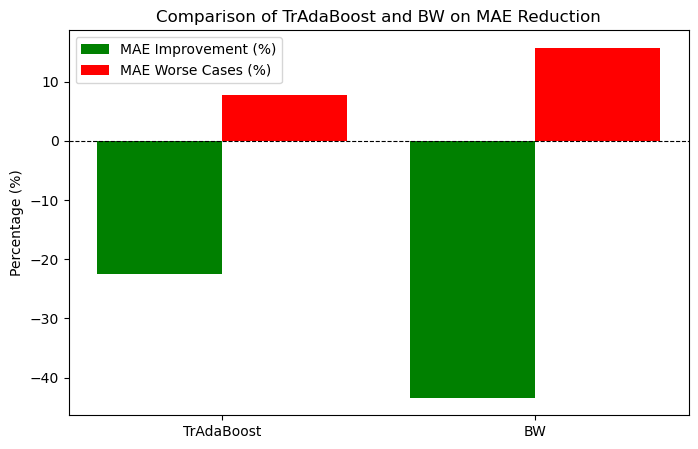

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Data
methods = ["TrAdaBoost", "BW"]
mae_improvement = [-22.57, -43.40]  # Negative means MAE reduced (good)
mae_worse = [7.73, 15.70]  # Positive means MAE increased (bad)

x = np.arange(len(methods))

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - 0.2, mae_improvement, width=0.4, label="MAE Improvement (%)", color='green')
ax.bar(x + 0.2, mae_worse, width=0.4, label="MAE Worse Cases (%)", color='red')

# Labels & Titles
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.axhline(0, color='black', linewidth=0.8, linestyle='dashed')  # Reference line at 0
ax.set_ylabel("Percentage (%)")
ax.set_title("Comparison of TrAdaBoost and BW on MAE Reduction")
ax.legend()

# Show plot
plt.show()